# Modeling the Anharmonic Oscillator

### Adrian Martin

## Big Idea

This project models the anharmonic oscillator. An **anharmonic oscillator** is any oscillating system that does not follow a simple harmonic oscillation pattern. For a simple harmonic oscillator, the potential is calculated using the equation $V(x) = x^2$, and the potential well can be depicted as a parabola, shown below. In this case, the period is unaffected by the amplitude. However, if the potential well has a different shape, for example $V(x) = x^4$, the oscillation is considered anharmonic, and the period does depend on the amplitude. In this document, I will use Romberg integration to model various potential wells, and the relationship between period and amplitude for each.
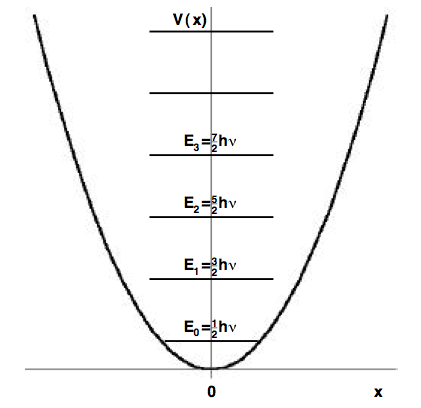  

### Controlling Equation:

\begin{equation*}
T = \sqrt{8m}\int_{0}^{a}\frac{dx}{\sqrt{V(a)-V(x)}}
\end{equation*}

This equation gives the relationship between the period, T, and the amplitude, a, of a simple harmonic oscillator. V(x) is the function that gives the potential at a given position x, and m is the mass of the oscillator.

### Scenerio:

Most types of oscillators become anharmonic when the oscillation is large, or when they are part of a coupled system. One example of an anharmonic system is a pendulum oscillating at large angles. At small angles, we can approximate the motion of a pendulum to be harmonic. However, when the angle of a pendulum is large the direction of the acceleration and the velocity become more out of sync with each other, and the oscillation becomes more anharmonic. Thus, when a pendulum is swinging at large angles, the period becomes more dependent on the amplitude. In this case, $V(x) = mgl(1-cos(\theta))$ [1]. This is approximately equal to $mglx^2$ at small angles by the small angle approximation.
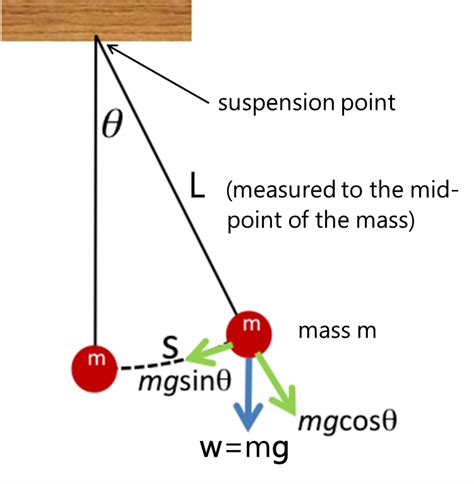

This YouTube video shows an exaggerated version of an anharmonic oscillation. It is a pendulum modified with a magnet in the center that manipulates the potential function and creates an ahnarmoic oscillation pattern:  

https://www.youtube.com/watch?v=fBKZKQnJTY8

This YouTube video illustrates that the period of pendulum oscillation is longer at larger angles:

https://www.youtube.com/watch?v=U30vnuplsnU

#### Boundary conditions for the large angle pendulum:

For a pendulum, the period must be positive, and it would not make sense for $\theta$ to be greater than $\pi$ radians or less than zero radians. And at these extremes, there is no oscillation, so the boundary conditions are $0 < \theta < \pi$, and $0 < period < infinity$.

### Deriving the Formula for Period vs Amplitude

\begin{equation*}
E = \frac{1}{2}m\big(\frac{dx}{dt}\big)^2 + V(x)
\end{equation*}

\begin{equation*}
E - V(x) = \frac{1}{2}m\big(\frac{dx}{dt}\big)^2
\end{equation*}

\begin{equation*}
\frac{2(E - V(x))}{m} = \big(\frac{dx}{dt}\big)^2
\end{equation*}

\begin{equation*}
\frac{dx}{dt} = \sqrt{\frac{2(E - V(x))}{m}}
\end{equation*}

\begin{equation*}
x = \int_{0}^{\frac{T}{4}}\sqrt{\frac{2(E - V(x))}{m}}dt
\end{equation*}

\begin{equation*}
x = \sqrt{\frac{2(E - V(x))}{m}} \frac{T}{4}
\end{equation*}

\begin{equation*}
T = \frac{4 \sqrt{m} x}{\sqrt{2(E-V(x))}}
\end{equation*}

\begin{equation*}
T = \sqrt{8m}\frac{x}{\sqrt{E-V(x)}}
\end{equation*}

$since \space E = V(a) \space when \space t = 0$

\begin{equation*}
T = \sqrt{8m}\int_{0}^{a}\frac{dx}{\sqrt{V(a)-V(x)}}
\end{equation*}


### Example of Calculating Period

In [3]:
%matplotlib inline
import math
import numpy as np
import pylab as plt
from romberg import romberg

def V (x):
    """Returns the potnential at a given x position
    
    Arguements: x - distnace from the center
    
    Returned: x^4 - the potential funciton"""
    
    return x**4

def integrationFunc (x):
    """Returns the function to be integrated
    
    Arguements: x - distnace from the center
    
    Returned: the function that is integrated in the period calcualtion"""
    
    return 1 / math.sqrt(V(amplitude)-V(x))
    
def periodCalculation (Vofx, mass, amplitude, tolerance):
    """Returns the period of the oscillator given an amplitude
    
    Arguements: Vofx - potential function
                mass - mass of the particle
                amplitude - amplitude of particle's oscillation
                tolerance - accuracy of integration
    
    Returned: period - the period of oscillation"""
    
    period = math.sqrt(8 * mass) * romberg(Vofx,(0,amplitude-1e-6),tolerance)
    
    return period
            

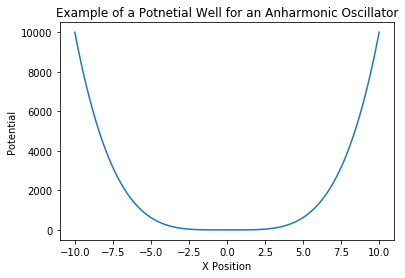

In [4]:
xPosition = []
potential = []

# Plot the potential well
for i in np.linspace (-10, 10, 100):
    xPosition.append(i)
    potential.append(V(i))
    
plt.title("Example of a Potnetial Well for an Anharmonic Oscillator")    
plt.xlabel("X Position")
plt.ylabel("Potential")
plt.plot(xPosition, potential)

This plot is an example of the potential well for an anharmonic oscillator. Simple harmonic oscillators follow a parabolic potential well, with potential ~ $x^2$. This potential well has potential ~ $x^4$.

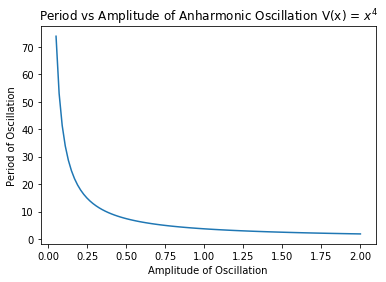

In [5]:
periods = []
amplitudes = []

# Create period and amplitude arrays
for a in np.linspace (0.05, 2, 100): # Starts at 0.05 because the function approaches infinity as a -> 0
    amplitude = a
    periods.append(periodCalculation (integrationFunc, 1, a, 1e-10))
    amplitudes.append(a)

plt.title("Period vs Amplitude of Anharmonic Oscillation V(x) = $x^4$")    
plt.xlabel("Amplitude of Oscillation")
plt.ylabel("Period of Oscillation")
plt.plot(amplitudes, periods)

The above plot shows how period depends on amplitude for an oscillator of mass = 1 (in arbitrary units) in a potential well of $V(x) = x^4$. We can see that the period increases as amplitude approaches zero, and approaches zero as the amplitude increases. This is because the potential at position x is equal to $x^4$. In a simple harmonic oscillator, the potential function is $V(x) = x^2$, and the period is not affected by the amplitude. Compared to a harmonic potential well, a well that follows an $V(x) = x^4$ curve has a smaller slope as x approaches zero, and a larger slope when x is greater than one. This makes it so that when x is small, the change in potential is small, so one period will take longer. And when x is large, the change in potential is large, so one period will take less time. 

### Varying the Parameters

In [6]:
# Define more potential well functions to examine

def VHarmonic (x):
    """Returns the potnential at a given x position
    
    Arguements: x - distnace from the center
    
    Returned: x^2 - the harmonic potential funciton"""
    
    return x**2 

def V1 (x):
    """Returns the potnential at a given x position
    
    Arguements: x - distnace from the center
    
    Returned: x^6 - the potential funciton"""
    
    return x**6

def V2 (x):
    """Returns the potnential at a given x position
    
    Arguements: x - distnace from the center
    
    Returned: x^8 - the potential funciton"""
    
    return x**8

def integrationFuncHarmonic (x):
    """Returns the function to be integrated
    
    Arguements: x - distnace from the center
    
    Returned: the function that is integrated in the period calcualtion"""
    
    return 1 / math.sqrt(VHarmonic(amplitude)-VHarmonic(x))

def integrationFunc1 (x):
    """Returns the function to be integrated
    
    Arguements: x - distnace from the center
    
    Returned: the function that is integrated in the period calcualtion"""
    
    return 1 / math.sqrt(V1(amplitude)-V1(x))

def integrationFunc2 (x):
    """Returns the function to be integrated
    
    Arguements: x - distnace from the center
    
    Returned: the function that is integrated in the period calcualtion"""
    
    return 1 / math.sqrt(V2(amplitude)-V2(x))

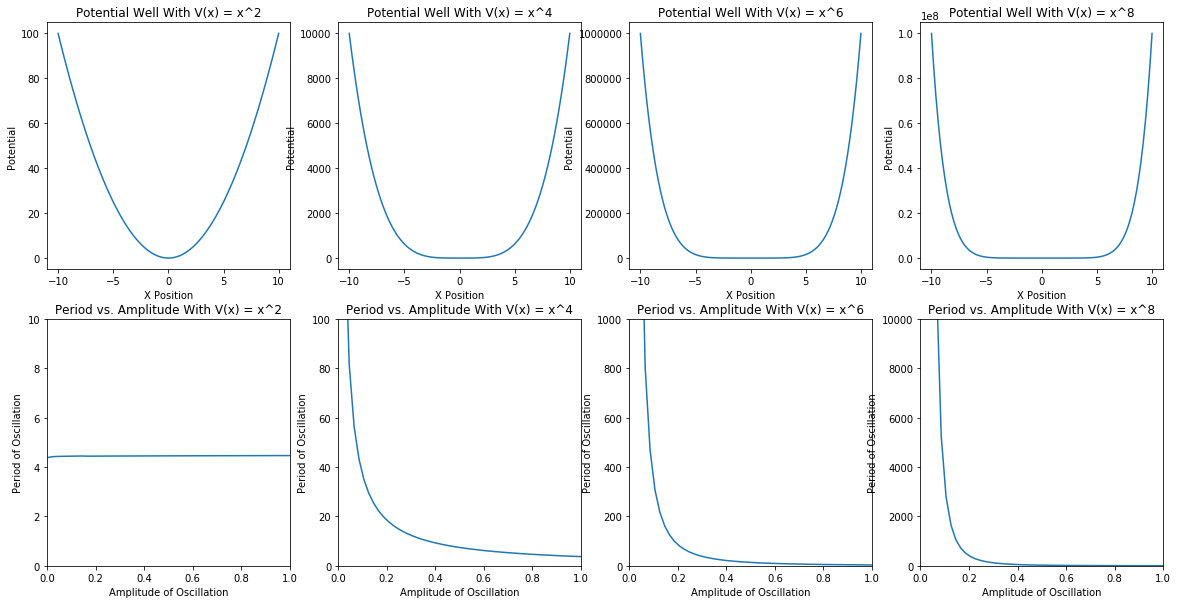

In [9]:
plt.figure(figsize = (20,10))

count = 0

# Plot the potential well as above for each new function
for func in [VHarmonic, V, V1, V2]:
    xPosition = []
    potential = []
    
    count += 1

    for i in np.linspace (-10, 10, 100):
        xPosition.append(i)
        potential.append(func(i))
    
    ax = plt.subplot(2,4,count) 
    plt.title("Potential Well With V(x) = x^{}".format(count*2))
    plt.xlabel("X Position")
    plt.ylabel("Potential")
    plt.plot(xPosition, potential)

count = 0 

# Plot period vs amplitude as above for each new function
for func in [integrationFuncHarmonic, integrationFunc, integrationFunc1, integrationFunc2]:    
    
    periods = []
    amplitudes = []
    
    count += 1

    for a in np.linspace (0.005, 2, 100):
        amplitude = a
        periods.append(periodCalculation (func, 1, a, 1e-10))
        amplitudes.append(a)

    ax = plt.subplot(2,4,count + 4)
    
    plt.title("Period vs. Amplitude With V(x) = x^{}".format(count*2))
    plt.xlabel("Amplitude of Oscillation")
    plt.ylabel("Period of Oscillation")
    plt.plot(amplitudes, periods)
    plt.ylim(0,10**count) # This was the best range for comparing each plot
    plt.xlim(0,1)
    
    
plt.show()

The above plots show various potential wells along with their corresponding plots of period vs amplitude. In each of these plots, the mass of the particle is 1 (in arbitrary units). We can see that as the potential well gets steeper the greater dependency the period of the oscillation has on the amplitude.
  
The first plot shows the well of a simple harmonic oscillator, with the potential function $V(x) = x^2$. The corresponding period vs amplitude plot shows a line with a constant slope (period = 4.5 approximately). This is to be expected, because period does not depend on amplitude in simple harmonic oscillators.  
  
The second plot is the same as the original one above, with the potential function $V(x) = x^4$. Here, the period has a sharp decline when amplitude is close to zero, and quickly approaches an asymptote of period = 0 as amplitude increases.  
  
The third plot shows the data for the potential function $V(x) = x^6$. Here, the period values are larger than before where x is close to zero, and there is a sharper decrease as amplitude increases. The period still approaches an asymptote of period = 0 as x increases. This makes sense, because the potential well has a steeper slope when x is greater than 1, and a flatter slope when x is less than 1.

The third plot shows the data for the potential function $V(x) = x^8$. Here, the period values even are larger than the previous plots where x is close to zero, and there is a sharper decrease as amplitude increases. The period still approaches an asymptote of period = 0 as x increases. This makes sense, because the potential well has a steeper slope when x is greater than 1, and a flatter slope when x is less than 1.

### Modeling Pendulum Motion

In [29]:
# Define potential functions for pendulum

def VPendulum (theta):
    """Returns the potnential at a given angle for a pendulum
    
    Arguements: theta - the angle of the pendulum
    
    Returned: 1 - cos(theta) - the harmonic potential funciton"""
    
    return 1 - math.cos(theta)

def integrationFuncPendulum (x):
    """Returns the function to be integrated
    
    Arguements: x - distnace from the center
    
    Returned: the function that is integrated in the period calcualtion"""
    
    return 1 / math.sqrt(VPendulum(amplitude)-VPendulum(x))

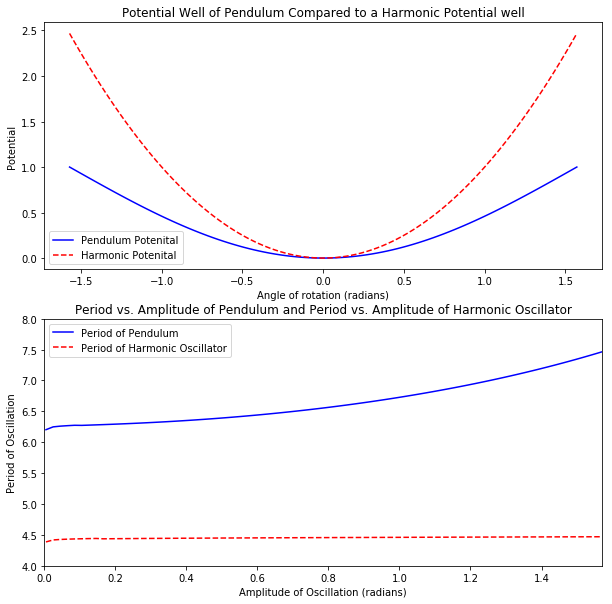

In [31]:
plt.figure(figsize = (10,10))

# Plot potential well of pendulum and SHO on the same subplot
xPositionP = []
potentialP = []
xPositionH = []
potentialH = []
    
for i in np.linspace (-math.pi/2, math.pi/2, 100):
    xPositionP.append(i)
    potentialP.append(VPendulum(i))
    
for i in np.linspace (-math.pi/2, math.pi/2, 100):
    xPositionH.append(i)
    potentialH.append(VHarmonic(i))    

ax = plt.subplot(2,1,1)
plt.title("Potential Well of Pendulum Compared to a Harmonic Potential well")
plt.xlabel("Angle of rotation (radians)")
plt.ylabel("Potential")
plt.plot(xPositionP, potentialP, "b", label = "Pendulum Potenital")
plt.plot(xPositionH, potentialH, "r--", label = "Harmonic Potenital")
plt.legend(loc = "best")

# Plot period vs amplitude of pendulum and SHO on the same subplot
periodsP = []
amplitudesP = []
periodsH = []
amplitudesH = []

for a in np.linspace (0.005, 2, 100):
    amplitude = a
    periodsP.append(periodCalculation (integrationFuncPendulum, 1, a, 1e-10))
    amplitudesP.append(a)
    
for a in np.linspace (0.005, 2, 100):
    amplitude = a
    periodsH.append(periodCalculation (integrationFuncHarmonic, 1, a, 1e-10))
    amplitudesH.append(a)

ax = plt.subplot(2,1,2)
    
plt.title("Period vs. Amplitude of Pendulum and Period vs. Amplitude of Harmonic Oscillator")
plt.xlabel("Amplitude of Oscillation (radians)")
plt.ylabel("Period of Oscillation")
plt.plot(amplitudesP, periodsP, "b", label = "Period of Pendulum")
plt.plot(amplitudesH, periodsH, "r--", label = "Period of Harmonic Oscillator")
plt.ylim(4,8)
plt.xlim(0,math.pi/2)
plt.legend(loc = "best")
    
plt.show()

The above plots compare the motion of a pendulum to that of a true simple harmonic oscillator. The top plot shows the potential well of each system. The potential function for the pendulum is $V(x) = 1 - cos(\theta)$ (assuming mgl = 1) [1], where the potential function for a simple harmonic oscillator is $V(x) = x^2$. By the small angle approximation, when x is close to zero, these are approximately equal, but as theta increases, this approximation becomes less accurate. The period vs amplitude plot shows that the period of the pendulum increases slightly with amplitude while the simple harmonic oscillator does not. This makes sense, because the slope of the potential well of the pendulum increases less sharply in comparison to the harmonic oscillator as x increases, so the period will take slightly longer as x increases.

## Analysis

The parameter I chose to vary was the function V(x). I used the integration method outlined in Newman on various potential wells.  
  
First I modeled higher order potential wells, such as the one Newman suggested, $V(x) = x^4$, $V(x) = x^6$, $V(x) = x^8$. In each of these cases, as amplitude approached zero, the period approached infinity, and as x approached infinity, the period approached zero. The higher the order of the potential function, the steeper the slope was when the amplitude was close to zero, and the sharper the curve was. This is verified, because it follows what we have previously learned about potential wells. Since the higher order wells are steeper than the harmonic well when x is greater than 1, then the oscillation should take less time at higher amplitudes. In addition, the higher order wells are shallower than the harmonic well when x is less than 1, so the oscillation should take more time at smaller amplitudes.

Next, I tried modeling simple harmonic motion using Newman's method. For this, I used the potential function $V(x) = x^2$, and the plot of period vs amplitude was a constant line. This is what we expect, because for simple harmonic oscillators, period does not depend on amplitude.

Last, I tried modeling the motion of a pendulum using the potential function $V(x) = cos(\theta)$, and comparing it to the simple harmonic oscillator. From my plot of the potential well, we can see that the two potential functions are very close at small angles, but spread farther apart at large angles. The period vs amplitude plot shows that the period of oscillation for a pendulum is dependent on the amplitude, and this dependency increases as the amplitude increases. This is verified, because it follows the motion of actual pendulums [1].

## Scientific Summary

In this project, I used Romberg integration to model the relationship between the period and amplitude of anharmonic oscillators, one of which was a pendulum. This showed that even though period amplitude are unrelated in simple harmonic oscillation, they are related for anharmonic oscillation, and a pendulum can be considered an anharmonic oscillator when the amplitude is large. This is important, because it helps us understand the motion of many important and common physical systems.

## Personal Summary

I learned a lot from this project. Before researching anharmonic oscillators, I did not know how common they were, and I didn't know that a pendulum could be considered anharmonic at large amplitudes. Now I not only have a better sense of how most natural oscillators work, but I know how to use integration to model how their period is dependent on their amplitude. This is important to me, because I hope to go into engineering, and I know that oscillators like the pendulum are used in many human-made systems. Often these require precise calculations of motion, and in many cases, we are not able to use approximations like the small angle approximation.

### Sources

[1] Amore, P., Cervantes Valdovinos, M., Ornelas, G., & Zamudio Barajas, S. (2007). The nonlinear pendulum: formulas for the large amplitude period. Revista mexicana de física E, 53(1), 106-111.